In [28]:
# https://iamtrask.github.io//2015/07/27/python-network-part2/
# Оптимизация и градиентный спуск
# Алгоритм обратного распространения ошибки - не оптимизирован
# Он распространяет ошибку с выхода сети к началу по всем весам
# Для оптимизации служат различные алгоритмы 
#для построения графиков внутри notebook'a
%pylab inline 
import pylab as pl # библиотека для построения графиков
import numpy as np # библиотека для осуществления вычислений

Populating the interactive namespace from numpy and matplotlib


In [29]:
# sigmoid function - или функция активации нейронов
def sigmoid(x,deriv=False): 
    if(deriv==True): # если истина  - то нам нужна производная
        return x*(1-x) # возвращаем производную функции
    return 1/(1+np.exp(-x)) # возвращаем функцию

In [30]:
# для примера построим график функции
tmpX = np.arange(-5,5,0.1) 

In [31]:
tmpY = sigmoid(tmpX)

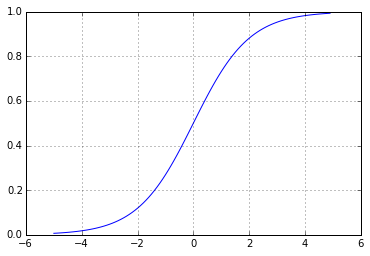

In [32]:
pl.plot(tmpX,tmpY)
plt.grid()

In [33]:
# Входные данные 2 входа и 4 примера
X = np.array([  [0,1],
                [0,1],
                [1,0],
                [1,0] ])
print(X)
print(X.shape)

[[0 1]
 [0 1]
 [1 0]
 [1 0]]
(4, 2)


In [34]:
# Выходные данные - 1 выход и 4 примера.
y = np.array([[0,0,1,1]]).T
print(y)
print(y.shape)

[[0]
 [0]
 [1]
 [1]]
(4, 1)


In [35]:
# При генерации случаных чисел
# использовать детерминированный подход, т.е.
# при каждом запуске будут генерироваться 
# по одним и тем же правилам
np.random.seed(1)

In [36]:
# генерируем "синапсы" - веса связи между нейронами
# у нас 2 входа и 1 выход
syn0 = 2*np.random.random((2,1)) - 1

print(syn0)
print(syn0.shape)

[[-0.16595599]
 [ 0.44064899]]
(2, 1)


In [37]:
errors=np.array([])
numJ =np.array([])
for j in range(10000):
# forward propagation
    # Загружаем сразу все тренировочные примеры
    # на 0 - входной слой
    l0 = X
    
    # Умножаем вход на веса
    # l0 - матрица 4x2 syn0 - 2x1
    # при перемножении - размерность в середине должна совпадать 4х2 * 2х1 = 4х1    
    l1 = sigmoid(np.dot(l0,syn0))
    
    # сравниваем с ожидаемым результатом
    # и сохраняем ошибку (4x1)
    l1_error = l1- y
    
    # формируем массив - номер обучения
    # и средняя ошибка и все веса
    # это для порсмотра режима обучения
    if (j%10==0):
        numJ=np.append(numJ,j)
        errors=np.append(errors,np.mean(np.abs(l1_error)))
        # print(syn0)
        
    # multiply how much we missed by the 
    # slope of the sigmoid at the values in l1
    # вычисляем разницу, но умножая ошибку 
    # на производную функции активации 
    # также вычисляем дельту
    # Вот тут и происходит градиентный спуск
    l1_delta = l1_error * sigmoid(l1,deriv=True)
    syn_deriv = np.dot(l0.T,l1_delta)
    # Обновляем значения весов
    # Самая главная часть 
    syn0 -= syn_deriv

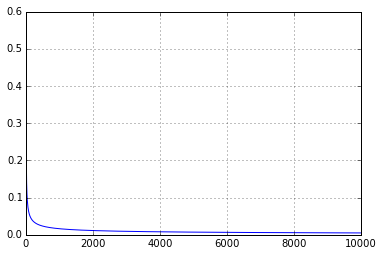

In [38]:
#Нарисуем кривую изменения ошибки
#print(numJ)
#print(errors)
pl.plot(numJ,errors)
pl.grid()

In [39]:
print ("Output After Training:")
print (l1)
print('Synapse')
print(syn0)

Output After Training:
[[ 0.00505119]
 [ 0.00505119]
 [ 0.99494905]
 [ 0.99494905]]
Synapse
[[ 5.28316618]
 [-5.28311816]]


In [40]:
# попробуем проверить - должно получится значение близкое к 0
testIn = np.array([0,1])
testOut = sigmoid(np.dot(testIn,syn0))
print(testOut[0])
# результат округляем
print(round(testOut[0]))

0.00505093506836
0.0


In [42]:
# попробуем проверить - должно получится значение близкое к 1
testIn = np.array([1,0])
testOut = sigmoid(np.dot(testIn,syn0))
print(testOut[0])
# результат округляем
print(round(testOut[0]))

0.994949306266
1.0
